<a href="https://www.kaggle.com/code/piyushsh012/dug-rresponse-predictions-99?scriptVersionId=299279009" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

file_path = '/kaggle/input/genomics-of-drug-sensitivity-in-cancer-gdsc/GDSC_DATASET.csv'  
gdsc_df = pd.read_csv(file_path)

gdsc_df.head()

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


In [5]:
gdsc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242035 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                242035 non-null  int64  
 1   CELL_LINE_NAME                           242035 non-null  object 
 2   TCGA_DESC                                240968 non-null  object 
 3   DRUG_ID                                  242035 non-null  int64  
 4   DRUG_NAME                                242035 non-null  object 
 5   LN_IC50                                  242035 non-null  float64
 6   AUC                                      242035 non-null  float64
 7   Z_SCORE                                  242035 non-null  float64
 8   GDSC Tissue descriptor 1                 232669 non-null  object 
 9   GDSC Tissue descriptor 2                 232669 non-null  object 
 10  Cancer Type (matching TCGA label

In [6]:
gdsc_df.columns

Index(['COSMIC_ID', 'CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME',
       'LN_IC50', 'AUC', 'Z_SCORE', 'GDSC Tissue descriptor 1',
       'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)',
       'Microsatellite instability Status (MSI)', 'Screen Medium',
       'Growth Properties', 'CNA', 'Gene Expression', 'Methylation', 'TARGET',
       'TARGET_PATHWAY'],
      dtype='object')

In [7]:
gdsc_df.isnull().sum()

COSMIC_ID                                      0
CELL_LINE_NAME                                 0
TCGA_DESC                                   1067
DRUG_ID                                        0
DRUG_NAME                                      0
LN_IC50                                        0
AUC                                            0
Z_SCORE                                        0
GDSC Tissue descriptor 1                    9366
GDSC Tissue descriptor 2                    9366
Cancer Type (matching TCGA label)          51446
Microsatellite instability Status (MSI)    12353
Screen Medium                               9366
Growth Properties                           9366
CNA                                         9366
Gene Expression                             9366
Methylation                                 9366
TARGET                                     27155
TARGET_PATHWAY                                 0
dtype: int64

# EDA

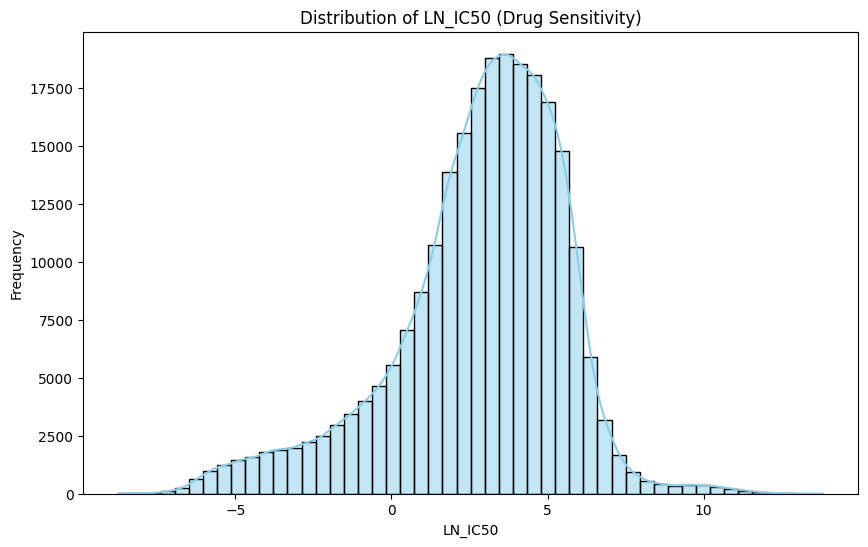

count    242035.000000
mean          2.817111
std           2.762191
min          -8.747724
25%           1.508054
50%           3.236744
75%           4.700111
max          13.820189
Name: LN_IC50, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of LN_IC50
plt.figure(figsize=(10, 6))
sns.histplot(gdsc_df['LN_IC50'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of LN_IC50 (Drug Sensitivity)')
plt.xlabel('LN_IC50')
plt.ylabel('Frequency')
plt.show()

# Basic statistics of LN_IC50
gdsc_df['LN_IC50'].describe()


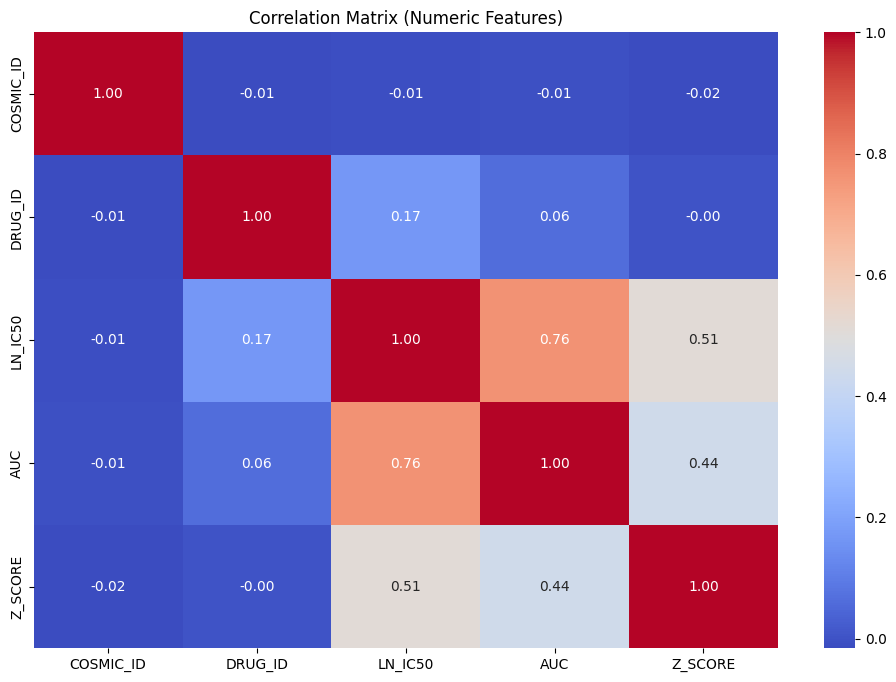

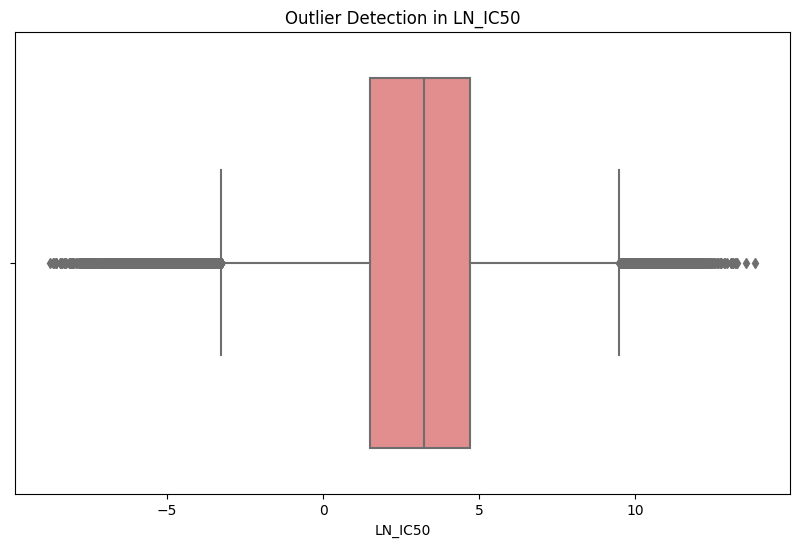

11542

In [9]:
# Select only numeric columns for correlation
numeric_cols = gdsc_df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

# Boxplot to visualize LN_IC50 outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=gdsc_df['LN_IC50'], color='lightcoral')
plt.title('Outlier Detection in LN_IC50')
plt.xlabel('LN_IC50')
plt.show()

# Count of extreme outliers (using IQR method)
Q1 = gdsc_df['LN_IC50'].quantile(0.25)
Q3 = gdsc_df['LN_IC50'].quantile(0.75)
IQR = Q3 - Q1
outliers = gdsc_df[(gdsc_df['LN_IC50'] < (Q1 - 1.5 * IQR)) | (gdsc_df['LN_IC50'] > (Q3 + 1.5 * IQR))]

# Number of outliers detected
outliers.shape[0]


# Data Preprocessing

In [10]:
gdsc_df_clean = gdsc_df.dropna(subset=['TARGET'])

gdsc_df_clean['Cancer Type (matching TCGA label)'].fillna(gdsc_df_clean['Cancer Type (matching TCGA label)'].mode()[0], inplace=True)
gdsc_df_clean['Microsatellite instability Status (MSI)'].fillna(gdsc_df_clean['Microsatellite instability Status (MSI)'].mode()[0], inplace=True)

# Apply one-hot encoding to key categorical features
encoded_df = pd.get_dummies(gdsc_df_clean, columns=['DRUG_NAME', 'TARGET_PATHWAY', 'Cancer Type (matching TCGA label)'], drop_first=True)

# Cap outliers in LN_IC50 using IQR method (Winsorization)
Q1 = gdsc_df_clean['LN_IC50'].quantile(0.25)
Q3 = gdsc_df_clean['LN_IC50'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

gdsc_df_clean['LN_IC50'] = gdsc_df_clean['LN_IC50'].clip(lower=lower_bound, upper=upper_bound)

gdsc_df_clean.info()
gdsc_df_clean.head()


<class 'pandas.core.frame.DataFrame'>
Index: 214880 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                214880 non-null  int64  
 1   CELL_LINE_NAME                           214880 non-null  object 
 2   TCGA_DESC                                213824 non-null  object 
 3   DRUG_ID                                  214880 non-null  int64  
 4   DRUG_NAME                                214880 non-null  object 
 5   LN_IC50                                  214880 non-null  float64
 6   AUC                                      214880 non-null  float64
 7   Z_SCORE                                  214880 non-null  float64
 8   GDSC Tissue descriptor 1                 206474 non-null  object 
 9   GDSC Tissue descriptor 2                 206474 non-null  object 
 10  Cancer Type (matching TCGA label)    

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,LUAD,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-3.452815,0.592660,-1.516647,bone,ewings_sarcoma,LUAD,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.452815,0.734047,-0.807232,bone,ewings_sarcoma,LUAD,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-3.452815,0.582439,-1.570016,bone,ewings_sarcoma,LUAD,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


# Model Training

In [11]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features and target
X = gdsc_df_clean.drop(['LN_IC50', 'COSMIC_ID', 'CELL_LINE_NAME'], axis=1)  # Dropping IDs
y = gdsc_df_clean['LN_IC50']

# One-hot encode remaining categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=7, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [12]:
# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.9733
RMSE: 0.4337
MAE: 0.3361


# SHAP Analysis

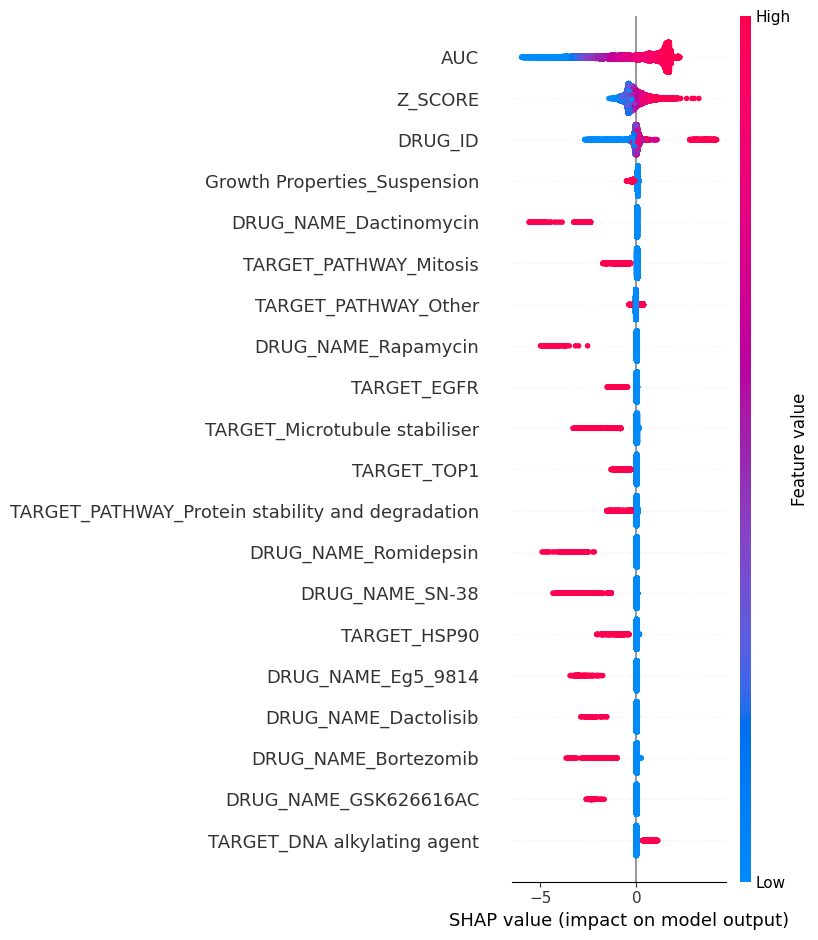

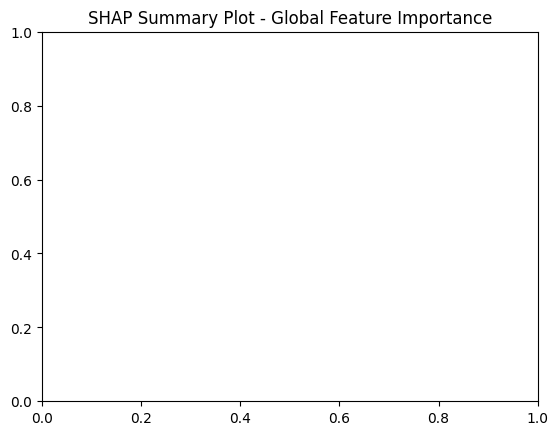

In [13]:
import shap

# Use TreeExplainer for XGBoost
explainer = shap.Explainer(xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# SHAP summary plot for overall feature impact
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot - Global Feature Importance")
plt.show()

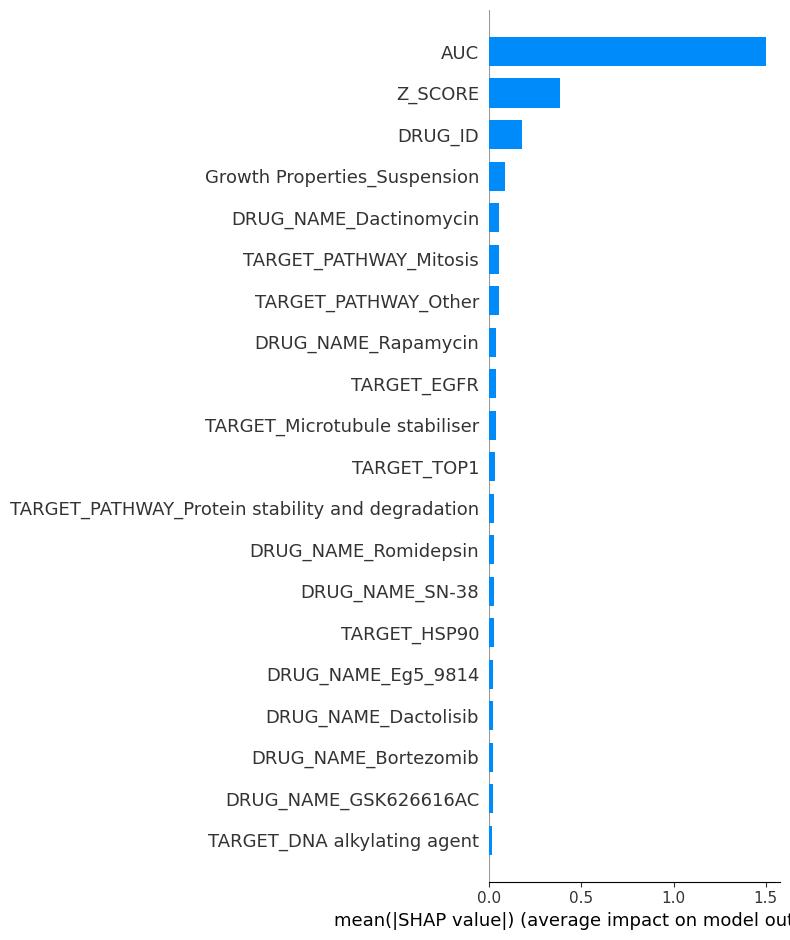

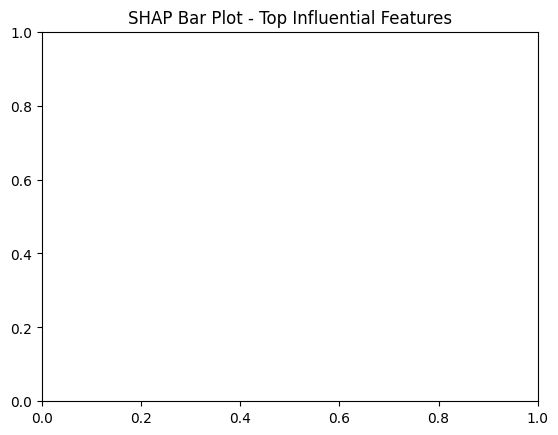

In [14]:
# SHAP beeswarm plot (shows impact and distribution)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("SHAP Bar Plot - Top Influential Features")
plt.show()

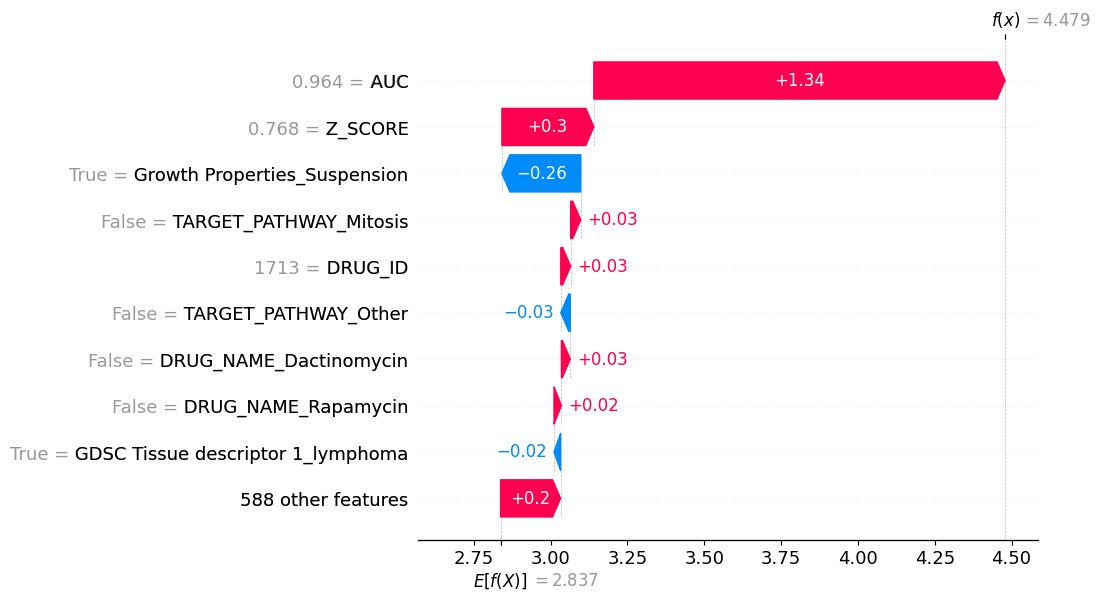

In [15]:
# Explain prediction for a single sample
sample_idx = 0
shap.plots.waterfall(shap_values[sample_idx], max_display=10)

# Fine-Tuning

In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

xgb_model = XGBRegressor(tree_method='gpu_hist', predictor='gpu_predictor', random_state=42)

param_dist = {
    'n_estimators': [300, 500, 700],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [0.5, 1, 1.5]  # L2 regularization
}

random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_dist,
                                   n_iter=20,  # Number of random combinations
                                   scoring='neg_root_mean_squared_error',
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          predictor='gpu_predictor', ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [5, 7, 9],
                                        'n_estimators': [300, 500, 700],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0.5, 1, 1.5],
                                        'subsample': [0.7, 0.8, 1.0]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [17]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("Best Parameters Found:", random_search.best_params_)
print(f"Tuned R² Score: {r2:.4f}")
print(f"Tuned RMSE: {rmse:.4f}")
print(f"Tuned MAE: {mae:.4f}")

Best Parameters Found: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 700, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Tuned R² Score: 0.9964
Tuned RMSE: 0.1589
Tuned MAE: 0.1092


In [18]:
import joblib

# Save the best model
model_filename = 'gdsc_xgboost_model.pkl'
joblib.dump(best_model, model_filename)

['gdsc_xgboost_model.pkl']

# Advanced SHAP Analysis

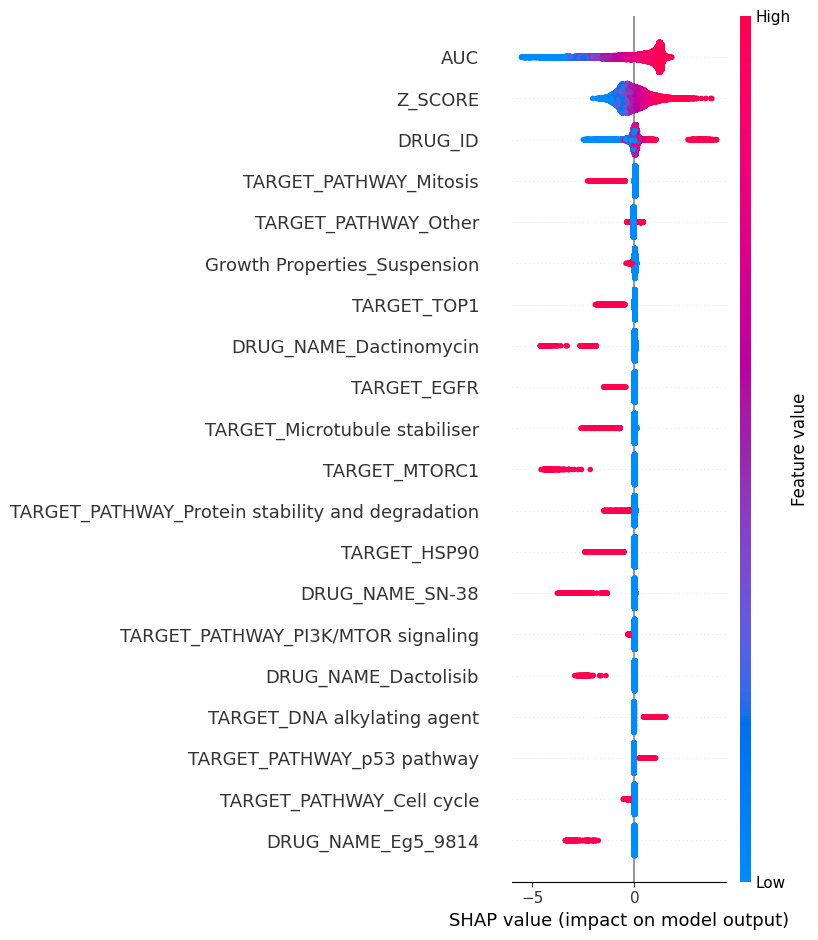

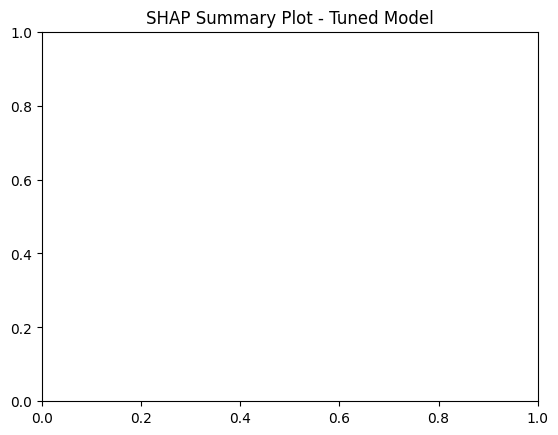

In [19]:
import shap

explainer = shap.Explainer(best_model)

shap_values = explainer(X_test)

# SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot - Tuned Model")
plt.show()

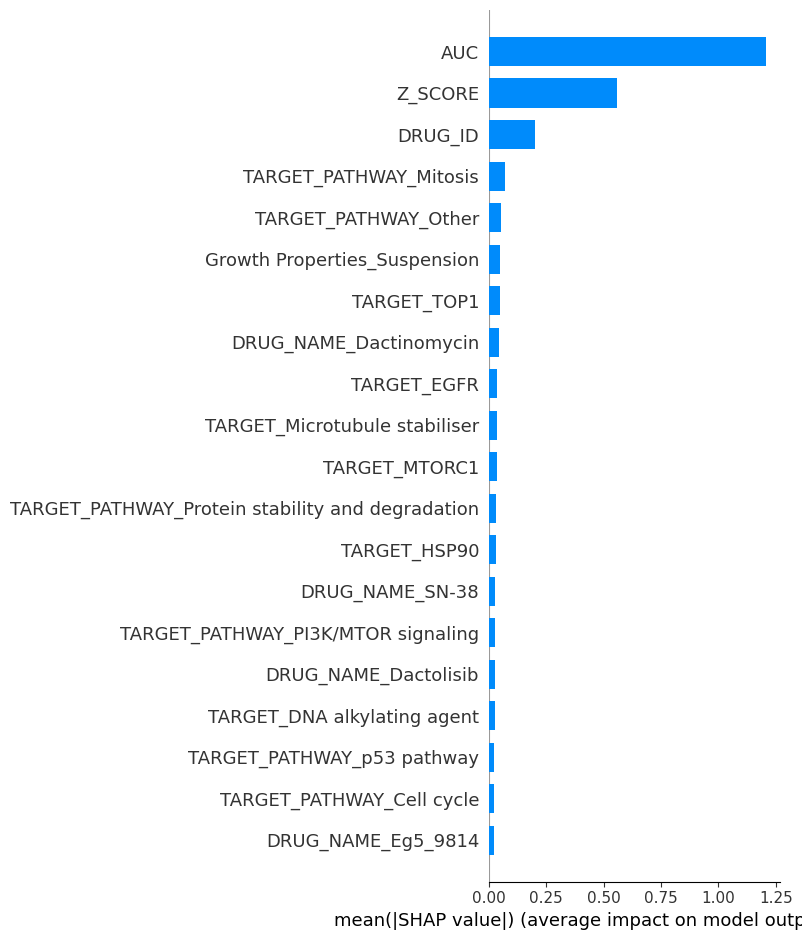

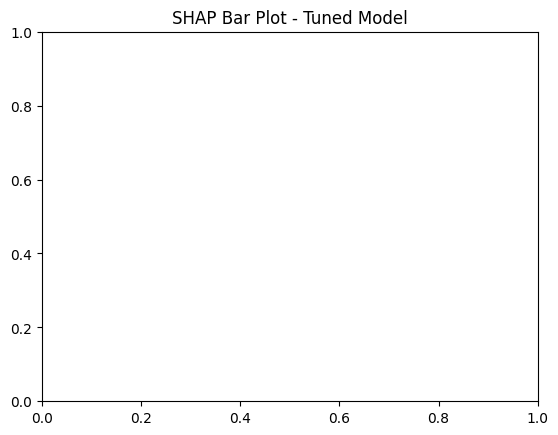

In [20]:
# SHAP bar plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("SHAP Bar Plot - Tuned Model")
plt.show()

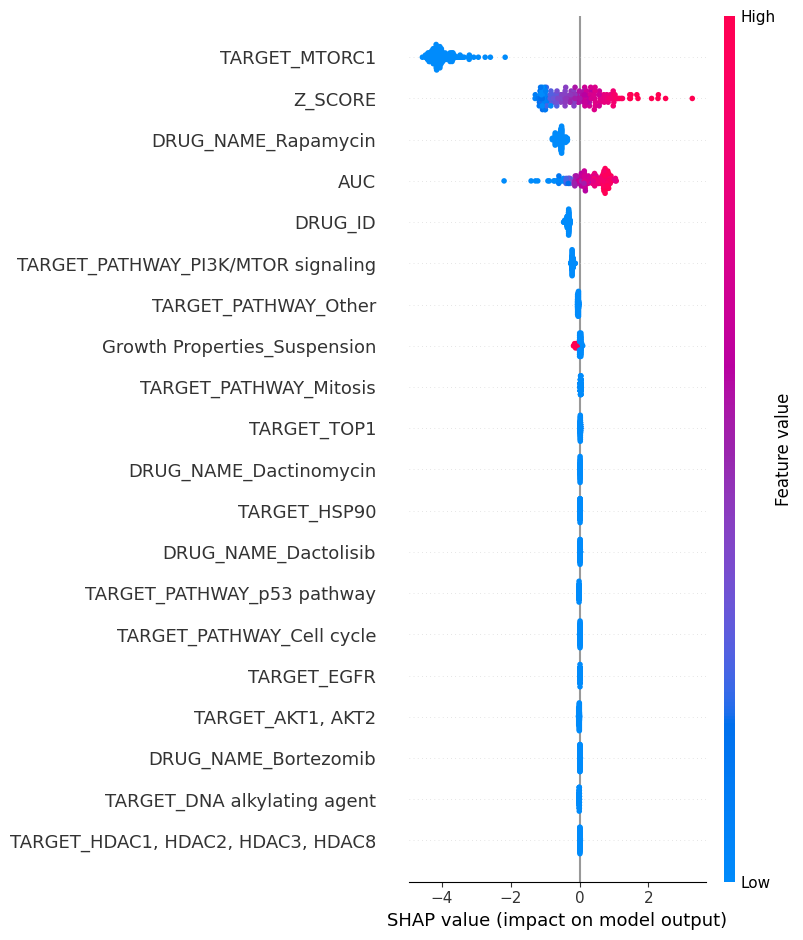

In [21]:
drug_name = 'Rapamycin'  # Change this to explore other drugs

# Reset index for X_test and SHAP values to align properly
X_test_reset = X_test.reset_index(drop=True)

# Find columns that match the drug name (for one-hot encoded features)
matching_columns = [col for col in X_test_reset.columns if drug_name in col]

if matching_columns:
    # Filter rows where the drug is active
    drug_filter = X_test_reset[X_test_reset[matching_columns].any(axis=1)]
    
    # Get the positions (integer indices) of the filtered rows
    filtered_indices = drug_filter.index.tolist()

    # Ensure SHAP values are correctly filtered using integer positions
    shap_filtered = shap.Explanation(
        values=shap_values.values[filtered_indices],
        base_values=shap_values.base_values[filtered_indices],
        data=shap_values.data[filtered_indices],
        feature_names=shap_values.feature_names
    )

    # Plot SHAP values if matches found
    if not drug_filter.empty:
        shap.summary_plot(shap_filtered, drug_filter)
    else:
        print(f"No samples found for {drug_name}")
else:
    print(f"Drug '{drug_name}' not found in feature columns.")


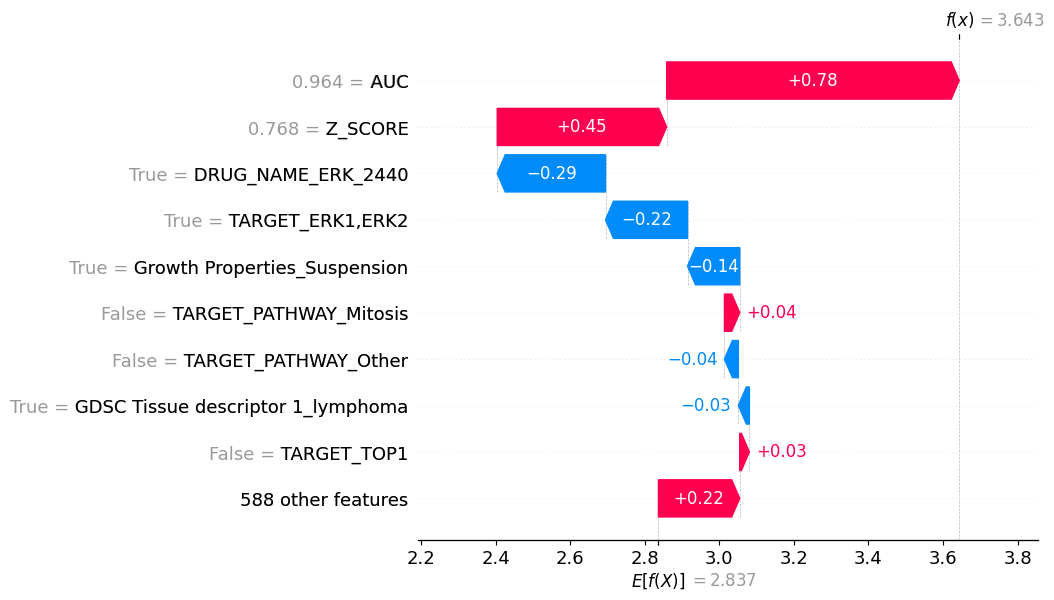

In [22]:
# Explain a single prediction (e.g., sample 0)
sample_idx = 0
shap.plots.waterfall(shap_values[sample_idx], max_display=10)

# Interface

In [23]:
#!pip install gradio

In [24]:
'''
import gradio as gr
import numpy as np
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt

model = joblib.load('/kaggle/working/gdsc_xgboost_model.pkl')

def predict_ic50(AUC, Z_SCORE, DRUG_ID, TARGET, TARGET_PATHWAY, Growth_Properties_Suspension):
    # Create DataFrame for input
    input_data = pd.DataFrame([{
        'AUC': AUC,
        'Z_SCORE': Z_SCORE,
        'DRUG_ID': DRUG_ID,
        'TARGET': TARGET,
        'TARGET_PATHWAY': TARGET_PATHWAY,
        'Growth Properties_Suspension': Growth_Properties_Suspension
    }])

    # One-hot encode categorical features if necessary
    input_data = pd.get_dummies(input_data)

    # Align input with model features
    model_features = model.get_booster().feature_names
    for feature in model_features:
        if feature not in input_data.columns:
            input_data[feature] = 0  # Add missing features with 0

    input_data = input_data[model_features]

    # Predict IC50
    ic50_pred = model.predict(input_data)[0]

    # SHAP Explanation
    explainer = shap.Explainer(model)
    shap_values = explainer(input_data)

    # Plot SHAP explanation
    plt.figure(figsize=(10, 6))
    shap.plots.waterfall(shap_values[0], max_display=10)
    plt.title("SHAP Explanation for Prediction")
    plt.savefig("shap_plot.png")
    plt.close()

    return f"Predicted LN_IC50: {ic50_pred:.3f}", "shap_plot.png"

inputs = [
    gr.Number(label="AUC (0.5 - 1.5)", value=0.85, info="Area Under Curve - Typically 0.5 to 1.5"),
    gr.Number(label="Z_SCORE (-2 to 2)", value=0.45, info="Z-Score for dose-response curve"),
    gr.Number(label="DRUG_ID (Numeric Code)", value=1003, info="Unique identifier for the drug"),
    gr.Textbox(label="TARGET", value="MTORC1", placeholder="e.g., MTORC1", info="Gene or protein targeted by the drug"),
    gr.Textbox(label="TARGET_PATHWAY", value="PI3K/MTOR signaling", placeholder="e.g., PI3K/MTOR signaling", info="Biological pathway affected"),
    gr.Checkbox(label="Growth Properties - Suspension", value=False, info="Check if cells grow in suspension")
]

outputs = [
    gr.Textbox(label="Predicted LN_IC50"),
    gr.Image(label="SHAP Explanation")
]

gr.Interface(
    fn=predict_ic50,
    inputs=inputs,
    outputs=outputs,
    title="GDSC Drug Sensitivity Predictor",
    description="Predict LN_IC50 for cancer drug response and visualize feature impact using SHAP. Please follow the input guidelines for accurate predictions.",
    theme="default"
).launch()
'''

'\nimport gradio as gr\nimport numpy as np\nimport shap\nimport joblib\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\nmodel = joblib.load(\'/kaggle/working/gdsc_xgboost_model.pkl\')\n\ndef predict_ic50(AUC, Z_SCORE, DRUG_ID, TARGET, TARGET_PATHWAY, Growth_Properties_Suspension):\n    # Create DataFrame for input\n    input_data = pd.DataFrame([{\n        \'AUC\': AUC,\n        \'Z_SCORE\': Z_SCORE,\n        \'DRUG_ID\': DRUG_ID,\n        \'TARGET\': TARGET,\n        \'TARGET_PATHWAY\': TARGET_PATHWAY,\n        \'Growth Properties_Suspension\': Growth_Properties_Suspension\n    }])\n\n    # One-hot encode categorical features if necessary\n    input_data = pd.get_dummies(input_data)\n\n    # Align input with model features\n    model_features = model.get_booster().feature_names\n    for feature in model_features:\n        if feature not in input_data.columns:\n            input_data[feature] = 0  # Add missing features with 0\n\n    input_data = input_data[model_features]\n\n 